In [262]:
!pwd

/content/disease_stigma


In [263]:

# !git clone https://github.com/KaihuiLiang/disease_stigma.git

In [264]:
# Navigate into your cloned repository (replace 'disease_stigma' if your folder name is different)
%cd disease_stigma

# 1. List all local and remote branches
!git branch -a

# 2. To check out an existing local branch:
# Replace 'your_branch_name' with the actual name of the branch you want to switch to.
# For example: !git checkout main
!git checkout neurodivergence

/content/disease_stigma/disease_stigma
  main
* neurodivergence
  remotes/origin/HEAD -> origin/main
  remotes/origin/codex/convert-csv-to-suitable-corpus-format
  remotes/origin/codex/create-requirements.txt
  remotes/origin/codex/explain-ndata-training-script-format-ie8lck
  remotes/origin/codex/guide-to-run-word-embedding-on-custom-corpus
  remotes/origin/codex/guide-to-run-word-embedding-on-custom-corpus-mjbt20
  remotes/origin/codex/organize-project-directory-structure
  remotes/origin/codex/rename-curr_year-to-start_year
  remotes/origin/codex/rename-data/-to-reference-data
  remotes/origin/codex/resolve-conflict-in-pr-#5
  remotes/origin/codex/update-output-directory-for-data-preparation
  remotes/origin/main
  remotes/origin/neurodivergence
Already on 'neurodivergence'
Your branch is up to date with 'origin/neurodivergence'.
Already on 'neurodivergence'
Your branch is up to date with 'origin/neurodivergence'.


In [718]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 1), reused 5 (delta 1), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 92.24 KiB | 1.30 MiB/s, done.
From https://github.com/KaihuiLiang/disease_stigma
   a676333..8a3341f  neurodivergence -> origin/neurodivergence
Updating a676333..8a3341f
Fast-forward
 data/original_mock/mock_articles_1980_2025.csv | 15000 +++++++++++------------
 1 file changed, 7500 insertions(+), 7500 deletions(-)


In [719]:
# Set working directory to /disease_stigma
import os
os.chdir('/content/disease_stigma')

In [720]:
# %pip uninstall -y numpy pandas gensim opencv-python opencv-contrib-python opencv-python-headless tensorflow numba

In [721]:
# %pip install -r requirements.txt

# Data preprocessing

In [722]:
import pandas as pd

file_path = os.path.join('data', 'original_mock', 'mock_articles_1980_2025.csv')

print("Current working directory:", os.getcwd())
print("File exists:", os.path.isfile(file_path))

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Display the first 5 rows of the DataFrame
    print(f"Successfully read file: {file_path}")
    display(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Current working directory: /content/disease_stigma
File exists: True
Successfully read file: data/original_mock/mock_articles_1980_2025.csv


,GOID,Date,publisher,title,Text,year
0,1980adh000,1980-01-01,mock,adhd article 0,adhd dangerous disgusting impure immoral dirty...,1980
1,1980aut000,1980-01-01,mock,autism article 0,autism dangerous disgusting impure immoral dir...,1980
2,1980dys000,1980-01-01,mock,dyslexia article 0,dyslexia dangerous disgusting impure immoral d...,1980
3,1980dow000,1980-01-01,mock,down_syndrome article 0,down_syndrome dangerous disgusting impure immo...,1980
4,1980tou000,1980-01-01,mock,tourette_syndrome article 0,tourette_syndrome dangerous disgusting impure ...,1980


In [723]:
!python data_prep/prepare_corpus_from_csv.py \
  --csv-path data/original_mock/mock_articles_1980_2025.csv \
  --text-column Text --title-column title --date-column Date \
  --output-root data/preprocessed --write-manifest

Finished writing pickles: 7500 kept, IDs not used 0 skipped empty, 0 skipped below length threshold


In [724]:
!ls -l data/preprocessed

total 184
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1980
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1981
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1982
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1983
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1984
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1985
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1986
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1987
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1988
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1989
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1990
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1991
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1992
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1993
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1994
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1995
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1996
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1997
drwxr-xr-x 2 root root 4096 Nov 22 00:39 NData_1998
dr

In [725]:
!ls -l data/preprocessed/NData_1980

total 368
-rw-r--r-- 1 root root 371611 Nov 22 07:23 corpus_1980.pkl
-rw-r--r-- 1 root root    601 Nov 22 07:23 manifest.json


In [726]:
!cat data/preprocessed/NData_1980/manifest.json

{
  "year": 1980,
  "pickle": "corpus_1980.pkl",
  "article_count": 500,
  "generated_at": "2025-11-22T07:23:43.989573+00:00",
  "source_csv": "data/original_mock/mock_articles_1980_2025.csv",
  "columns": {
    "title": "title",
    "text": "Text",
    "date": "Date",
    "id": null
  },
  "default_year": null,
  "min_body_chars": 0,
  "processing_steps": [
    "clean_text (collapse whitespace, strip)",
    "split_sentences (regex-based)",
    "join sentences with SENTENCEBOUNDARYHERE",
    "drop duplicates by id when provided",
    "drop empty rows",
    "drop rows below min_body_chars"
  ]
}

# Trainining

## Train phrase model for a 3-year window

In [727]:
!git pull

Already up to date.


In [728]:
# Global parameters
start_year = 1980
end_year = 2024
boots = 15
year_interval = 3

In [729]:
import sys, os
sys.path.append(os.getcwd())

In [730]:
!PYTHONPATH=$(pwd) python training/training_phraser.py \
    --start-year {start_year} \
    --end-year {end_year} \
    --year-interval {year_interval} \
    --raw-data-root data/preprocessed \
    --modeling-dir-base outputs/models


Training bigrammer for 1980-1982
Training bigrammer for 1983-1985
Training bigrammer for 1986-1988
Training bigrammer for 1989-1991
Training bigrammer for 1992-1994
Training bigrammer for 1995-1997
Training bigrammer for 1998-2000
Training bigrammer for 1989-1991
Training bigrammer for 1992-1994
Training bigrammer for 1995-1997
Training bigrammer for 1998-2000
Training bigrammer for 2001-2003
Training bigrammer for 2004-2006
Training bigrammer for 2007-2009
Training bigrammer for 2010-2012
Training bigrammer for 2001-2003
Training bigrammer for 2004-2006
Training bigrammer for 2007-2009
Training bigrammer for 2010-2012
Training bigrammer for 2013-2015
Training bigrammer for 2016-2018
Training bigrammer for 2019-2021
Training bigrammer for 2022-2024
Training bigrammer for 2013-2015
Training bigrammer for 2016-2018
Training bigrammer for 2019-2021
Training bigrammer for 2022-2024


In [731]:
!ls -l outputs/models/phrasers

total 372
-rw-r--r-- 1 root root 21771 Nov 22 07:23 bigrammer_1980_1982
-rw-r--r-- 1 root root 21916 Nov 22 07:23 bigrammer_1983_1985
-rw-r--r-- 1 root root 21718 Nov 22 07:23 bigrammer_1986_1988
-rw-r--r-- 1 root root 22503 Nov 22 07:23 bigrammer_1989_1991
-rw-r--r-- 1 root root 22195 Nov 22 07:23 bigrammer_1992_1994
-rw-r--r-- 1 root root 21845 Nov 22 07:23 bigrammer_1995_1997
-rw-r--r-- 1 root root 22194 Nov 22 07:23 bigrammer_1998_2000
-rw-r--r-- 1 root root 22098 Nov 22 07:23 bigrammer_2001_2003
-rw-r--r-- 1 root root 22696 Nov 22 07:23 bigrammer_2004_2006
-rw-r--r-- 1 root root 21851 Nov 22 07:23 bigrammer_2007_2009
-rw-r--r-- 1 root root 22359 Nov 22 07:23 bigrammer_2010_2012
-rw-r--r-- 1 root root 22335 Nov 22 07:23 bigrammer_2013_2015
-rw-r--r-- 1 root root 21991 Nov 22 07:23 bigrammer_2016_2018
-rw-r--r-- 1 root root 22687 Nov 22 07:23 bigrammer_2019_2021
-rw-r--r-- 1 root root 21992 Nov 22 07:23 bigrammer_2022_2024
-rw-r--r-- 1 root root 10406 Nov 22 05:32 bigrammer_2025_202

## Train bootstrapped Word2Vec models

In [732]:
# !git pull

In [733]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [734]:
!PYTHONPATH=$(pwd) python training/training_w2v_booted.py \
  --start-year {start_year} \
  --end-year {end_year} \
  --year-interval {year_interval} \
  --boots {boots} \
  --min-count 1 \
  --iterations 3 \
  --window 10 \
  --vector-size 300 \
  --sleep 0 \
  --raw-data-root data/preprocessed \
  --modeling-dir-base outputs/models
# TODO: change boots back to 25 for official run
# TODO: change min-count back to 50 for official run

[1/15] Training W2V for 1980-1982
[2/15] Training W2V for 1983-1985
[2/15] Training W2V for 1983-1985
[3/15] Training W2V for 1986-1988
[3/15] Training W2V for 1986-1988
[4/15] Training W2V for 1989-1991
[4/15] Training W2V for 1989-1991
[5/15] Training W2V for 1992-1994
[5/15] Training W2V for 1992-1994
[6/15] Training W2V for 1995-1997
[6/15] Training W2V for 1995-1997
[7/15] Training W2V for 1998-2000
[7/15] Training W2V for 1998-2000
[8/15] Training W2V for 2001-2003
[8/15] Training W2V for 2001-2003
[9/15] Training W2V for 2004-2006
[9/15] Training W2V for 2004-2006
[10/15] Training W2V for 2007-2009
[10/15] Training W2V for 2007-2009
[11/15] Training W2V for 2010-2012
[11/15] Training W2V for 2010-2012
[12/15] Training W2V for 2013-2015
[12/15] Training W2V for 2013-2015
[13/15] Training W2V for 2016-2018
[13/15] Training W2V for 2016-2018
[14/15] Training W2V for 2019-2021
[14/15] Training W2V for 2019-2021
[15/15] Training W2V for 2022-2024
[15/15] Training W2V for 2022-2024


# Validation

In [735]:
!git pull

Already up to date.


In [736]:
!ls outputs/models/BootstrappedModels/1980_1982

allarticles_tabsep_1980_1982tempboot
CBOW_300d__win10_min1_iter3_1980_1982_boot0
CBOW_300d__win10_min1_iter3_1980_1982_boot1
CBOW_300d__win10_min1_iter3_1980_1982_boot10
CBOW_300d__win10_min1_iter3_1980_1982_boot11
CBOW_300d__win10_min1_iter3_1980_1982_boot12
CBOW_300d__win10_min1_iter3_1980_1982_boot13
CBOW_300d__win10_min1_iter3_1980_1982_boot14
CBOW_300d__win10_min1_iter3_1980_1982_boot2
CBOW_300d__win10_min1_iter3_1980_1982_boot3
CBOW_300d__win10_min1_iter3_1980_1982_boot4
CBOW_300d__win10_min1_iter3_1980_1982_boot5
CBOW_300d__win10_min1_iter3_1980_1982_boot6
CBOW_300d__win10_min1_iter3_1980_1982_boot7
CBOW_300d__win10_min1_iter3_1980_1982_boot8
CBOW_300d__win10_min1_iter3_1980_1982_boot9
CBOW_300d__win10_min50_iter3_1980_1982_boot0
CBOW_300d__win10_min50_iter3_1980_1982_boot1
CBOW_300d__win10_min50_iter3_1980_1982_boot2
CBOW_300d__win10_min50_iter3_1980_1982_boot3
CBOW_300d__win10_min50_iter3_1980_1982_boot4
CBOW_300d__win10_min50_iter3_1980_1982_boot5
CBOW_300d__win10_min50_iter3

In [737]:
# !python validation/validating_overall_w2v_models.py --model-path outputs/models/BootstrappedModels/1980_1982/CBOW_300d__win10_min50_iter3_1980_1982_boot0

# Compute stigma scores per dimension

In [738]:
!git pull

Already up to date.


In [739]:
!PYTHONPATH=$(pwd) python analysis/write_stigma_scores.py \
    --start-year {start_year} \
    --end-year {end_year} \
    --year-interval {year_interval} \
    --boots {boots} \
    --modeling-dir-base outputs/models \
    --results-dir outputs/results \
    --lexicon-min-count 1 \
    --plotting-groups neurodevelopmental
    
# TODO: Change boots back to 25 for official run
# TODO: Remove lexicon-min-count for official run

[INFO] Starting dimension 'danger'
[INFO] Using model_prefix from manifest: CBOW_300d__win10_min1_iter3 (year 1980-1982)
Skipping folded term epilepsy_folded: missing 'epilepsy' or 'epileptic' in vocab.
Skipping folded term drug_addiction_folded: missing 'drug_addiction' or 'drug_addict' in vocab.
Skipping folded term obesity_folded: missing 'obesity' or 'obese' in vocab.
[INFO] Writing 75 rows for danger 1980 to outputs/results/tempdanger1980.csv
[INFO] Using model_prefix from manifest: CBOW_300d__win10_min1_iter3 (year 1983-1985)
[INFO] Writing 75 rows for danger 1980 to outputs/results/tempdanger1980.csv
[INFO] Using model_prefix from manifest: CBOW_300d__win10_min1_iter3 (year 1983-1985)
[INFO] Writing 75 rows for danger 1983 to outputs/results/tempdanger1983.csv
[INFO] Using model_prefix from manifest: CBOW_300d__win10_min1_iter3 (year 1986-1988)
[INFO] Writing 75 rows for danger 1983 to outputs/results/tempdanger1983.csv
[INFO] Using model_prefix from manifest: CBOW_300d__win10_m

In [740]:
!ls outputs/results/temp*1980.csv


outputs/results/tempdanger1980.csv   outputs/results/tempimmorality1980.csv
outputs/results/tempdisgust1980.csv  outputs/results/tempimpurity1980.csv


# Aggregate and plot

In [741]:
!PYTHONPATH=$(pwd) python analysis/aggregating_stigma_index.py \
  --start-year {start_year} --end-year {end_year} --year-interval {year_interval} \
  --dimensions danger disgust immorality impurity \
  --input-dir outputs/results

In [742]:
import pandas as pd

df = pd.read_csv("outputs/results/stigmaindex_aggregated_temp_92CI.csv")
print("Rows:", len(df))
print(df.head())

# Quick sanity: non-NaN means and counts per plotting group
print(df[['Reconciled_Name','Year','PlottingGroup','count','mean']].head())
print(df[df['mean'].notna()].groupby('PlottingGroup')['mean'].count())


Rows: 75
  Reconciled_Name  Year       PlottingGroup  count      mean       std  \
0            ADHD  1980  neurodevelopmental     15  1.808910  0.098566   
1            ADHD  1983  neurodevelopmental     15  1.639296  0.048192   
2            ADHD  1986  neurodevelopmental     15  1.592877  0.102885   
3            ADHD  1989  neurodevelopmental     15  1.771884  0.051022   
4            ADHD  1992  neurodevelopmental     15  1.786301  0.055994   

        min       CI4      CI50      CI96       max    Dimension  
0  1.642681  1.655548  1.844645  1.934278  1.961356  stigmaindex  
1  1.574365  1.580661  1.649565  1.717816  1.732474  stigmaindex  
2  1.397591  1.445485  1.556341  1.741147  1.777387  stigmaindex  
3  1.707816  1.711433  1.753007  1.842588  1.847073  stigmaindex  
4  1.697376  1.698448  1.794440  1.857286  1.859835  stigmaindex  
  Reconciled_Name  Year       PlottingGroup  count      mean
0            ADHD  1980  neurodevelopmental     15  1.808910
1            ADHD  198

In [743]:
import pandas as pd
df = pd.read_csv("outputs/results/stigmaindex_aggregated_temp_92CI.csv")
print("Non‑NaN rows:", df[df["mean"].notna()].shape)
print(df[df["mean"].notna()][["Reconciled_Name","Year","PlottingGroup","count","mean"]].head(20))


Non‑NaN rows: (75, 12)
   Reconciled_Name  Year       PlottingGroup  count      mean
0             ADHD  1980  neurodevelopmental     15  1.808910
1             ADHD  1983  neurodevelopmental     15  1.639296
2             ADHD  1986  neurodevelopmental     15  1.592877
3             ADHD  1989  neurodevelopmental     15  1.771884
4             ADHD  1992  neurodevelopmental     15  1.786301
5             ADHD  1995  neurodevelopmental     15  1.802943
6             ADHD  1998  neurodevelopmental     15  1.808950
7             ADHD  2001  neurodevelopmental     15  1.819555
8             ADHD  2004  neurodevelopmental     15  1.860241
9             ADHD  2007  neurodevelopmental     15  1.767113
10            ADHD  2010  neurodevelopmental     15  1.829272
11            ADHD  2013  neurodevelopmental     15  1.809524
12            ADHD  2016  neurodevelopmental     15  1.816567
13            ADHD  2019  neurodevelopmental     15  1.838541
14            ADHD  2022  neurodevelopmental   

## Plot

In [744]:
!PYTHONPATH=$(pwd) python analysis/plotting_bootstrapped.py \
  --dimension stigmaindex \
  --min-count 0 \
  --results-dir outputs/results 
  
# TODO: change min-count back to 20 (or remove it) for official run

[INFO] Saved plot: outputs/results/neurodevelopmental_stigmaindex_Diseases_92CI_median.jpg


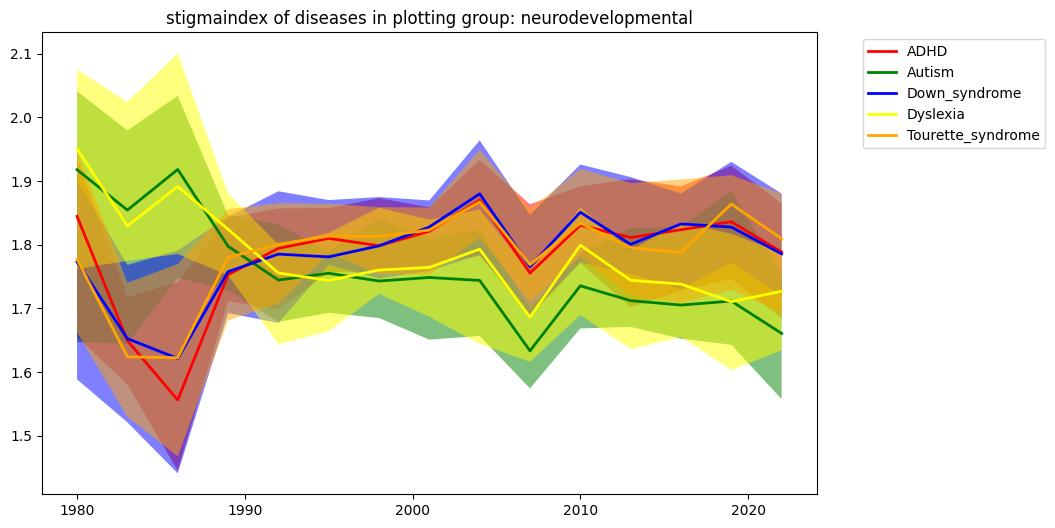

In [745]:
from pathlib import Path
from IPython.display import Image, display

plot_dir = Path("outputs/results")  # adjust if you used a different --output-dir
for img_path in sorted(plot_dir.glob("*neurodevelopmental*.jpg")):
    display(Image(filename=str(img_path)))